In [16]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [18]:
len(X_train)

60000

In [19]:
len(X_test)

10000

In [20]:
X_train[0].shape

(28, 28)

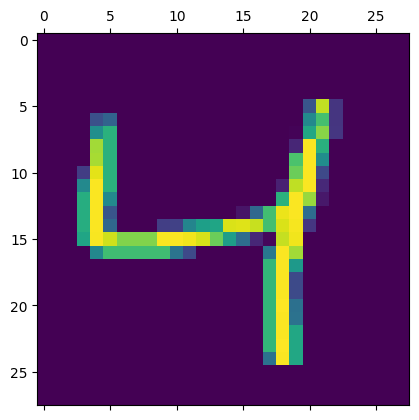

In [21]:
plt.matshow(X_train[2])

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
#flatterning
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8204 - loss: 0.7085
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9161 - loss: 0.3045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9207 - loss: 0.2927
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.2791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9264 - loss: 0.2652


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.3029


[0.26825010776519775, 0.9265000224113464]

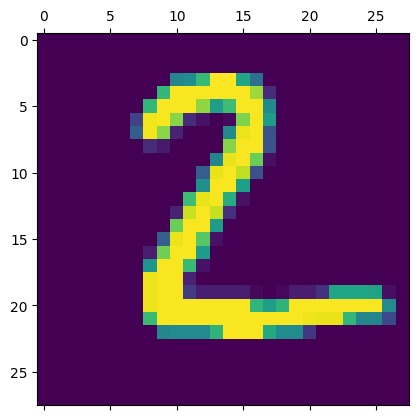

In [37]:
plt.matshow(X_test[1])

In [38]:
y_pred = model.predict(X_test_flattened)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.8167789e-01, 5.1586623e-03, 9.9895483e-01, 2.6959139e-01,
       2.7593527e-10, 8.1630528e-01, 8.6626101e-01, 6.1386275e-13,
       1.3790858e-01, 3.0746088e-09], dtype=float32)

In [39]:
np.argmax(y_pred[1])

2

In [40]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[7, 2, 1, 0, 4]

In [43]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   8,   11,  909,   17,    6,    4,   13,   10,   50,    4],
       [   3,    0,   16,  923,    0,   24,    3,   11,   24,    6],
       [   1,    1,    3,    2,  915,    0,   11,    4,   14,   31],
       [   9,    3,    1,   30,    9,  781,   15,    4,   35,    5],
       [  11,    3,    4,    1,    7,   12,  915,    2,    3,    0],
       [   2,    6,   22,    5,    7,    1,    0,  946,    5,   34],
       [   6,    7,    5,   17,    9,   22,   10,    6,  886,    6],
       [  11,    8,    1,   11,   28,    8,    0,   17,   10,  915]])>

Text(95.72222222222221, 0.5, 'Truth')

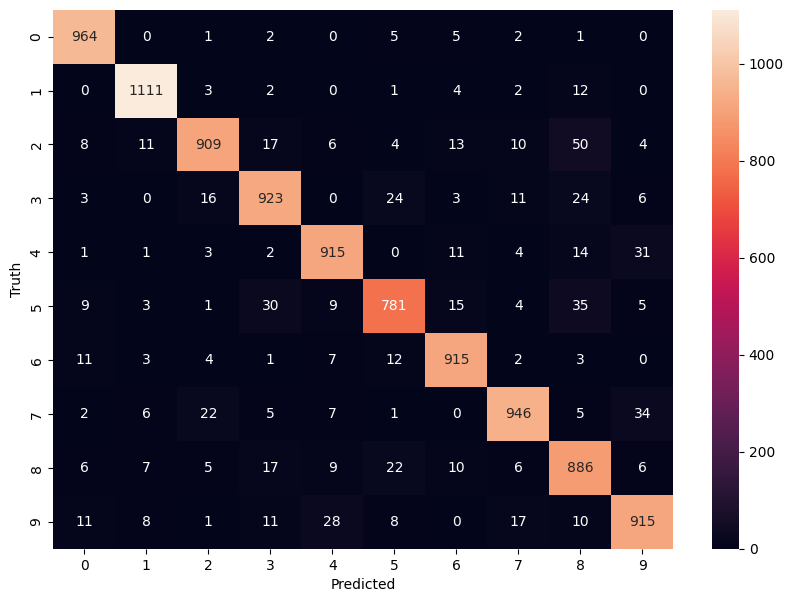

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8749 - loss: 0.4478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9628 - loss: 0.1328
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9734 - loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9839 - loss: 0.0522


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0914


[0.07975510507822037, 0.9760000109672546]

In [51]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    0,    2,    0,    1,    5,    1],
       [   0, 1118,    3,    1,    0,    0,    2,    0,   11,    0],
       [   2,    1,  997,    4,    2,    0,    2,   10,   13,    1],
       [   0,    0,    4,  981,    0,    8,    0,    4,    8,    5],
       [   0,    0,    4,    1,  952,    0,    5,    2,    3,   15],
       [   2,    0,    0,    4,    1,  876,    3,    1,    4,    1],
       [  10,    2,    1,    1,    6,    9,  923,    0,    6,    0],
       [   0,    0,    8,    5,    0,    0,    0, 1006,    3,    6],
       [   4,    0,    1,    1,    2,    1,    1,    5,  958,    1],
       [   1,    4,    0,    6,    4,    3,    0,    4,    8,  979]])>

Text(95.72222222222221, 0.5, 'Truth')

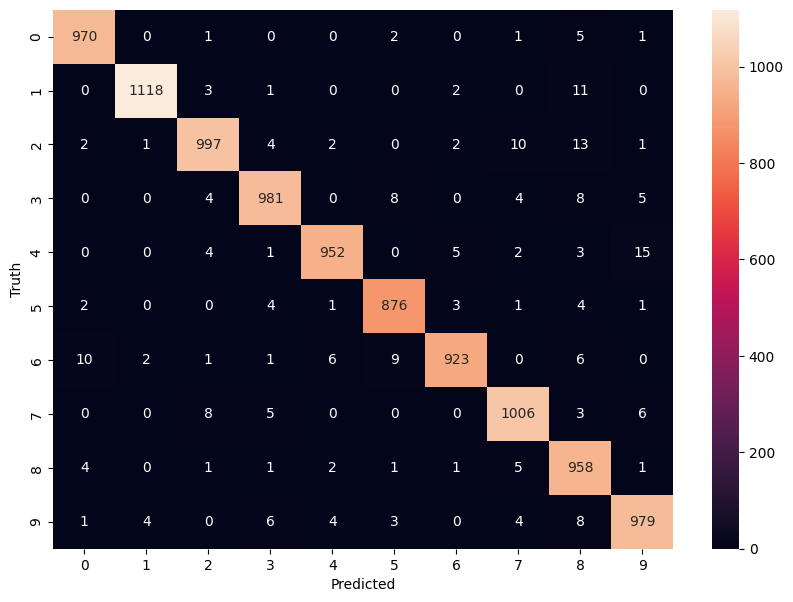

In [53]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")